In [1]:
using JuMP
using Gurobi, Ipopt
using Plots
using DataFrames
using CSV
using DelimitedFiles

In [2]:
function bicycle_model(state, input, dt, L)
    x, y, psi, v = state
    delta, a = input

    x_new = x + v * cos(psi) * dt
    y_new = y + v * sin(psi) * dt
    psi_new = psi + (v * tan(delta) / L) * dt
    v_new = v + a * dt

    return [x_new, y_new, psi_new, v_new]
end


bicycle_model (generic function with 1 method)

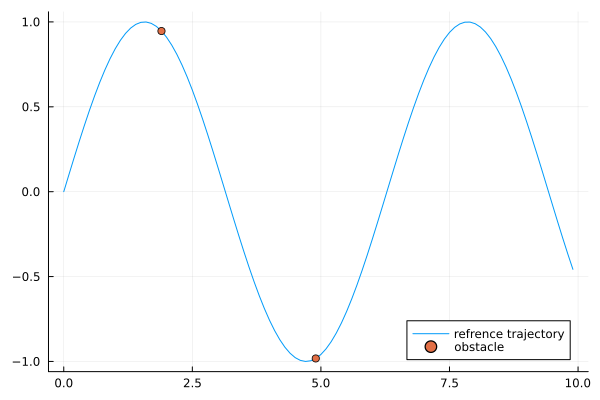

In [7]:
function reference_trajectory_gen(t)
    r = 2
    x_ref = t
    y_ref = sin(t)
    psi_ref = atan(cos(t))
    v_ref = 1.0
    return [x_ref, y_ref, psi_ref, v_ref]
end

len = 200
t = range(0,step=0.1,length=len)
ref_traj = Matrix{Float64}(undef, len,4)
for (i,t) in enumerate(t)
    ref_traj[i,:] = reference_trajectory_gen(t)
end
ref_x = ref_traj[:,1]
ref_y = ref_traj[:,2]
ref_psi = ref_traj[:,3]
ref_v = ref_traj[:,4]
N = len
obstacles = []
plot(ref_x[1:100],ref_y[1:100], label="refrence trajectory")

obstacles = [ref_x[50] ref_y[50] 0.2;
             ref_x[20] ref_y[20] 0.2]
scatter!(obstacles[:,1], obstacles[:,2] ,label="obstacle")

In [4]:
ref_x

200-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 18.8
 18.9
 19.0
 19.1
 19.2
 19.3
 19.4
 19.5
 19.6
 19.7
 19.8
 19.9

In [5]:
data = DataFrame(CSV.File("Circle_Traj_CW.csv"))
ref_traj = Matrix(data)
ref_x = ref_traj[:,1]
ref_y = ref_traj[:,2]
ref_psi = ref_traj[:,3]
ref_v = ref_traj[:,4]
N = size(data)[1]
obstacles = []
plot(ref_x,ref_y, label="refrence trajectory")

# obstacles = [ref_x[50] ref_y[50] 1]
# scatter!(obstacles[:,1], obstacles[:,2] ,label="obstacle")

LoadError: ArgumentError: "Circle_Traj_CW.csv" is not a valid file or doesn't exist

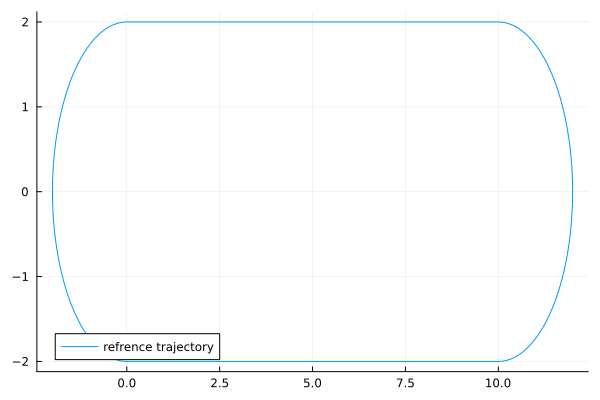

In [353]:
data = DataFrame(CSV.File("input_trajectory.csv"))
ref_traj = Matrix(data)
ref_x = ref_traj[:,1]
ref_y = ref_traj[:,2]

N = size(data)[1]
#ref_psi = ref_traj[:,3]
ref_v = ones(N)
ref_psi = zeros(N)
for i in 1:N-1
    ref_psi[i] = pi + atan(ref_y[i+1]-ref_y[i], ref_x[i+1]-ref_x[i])  
end
ref_traj = hcat(ref_traj,ref_psi,ref_v)
obstacles = []

plot(ref_x,ref_y, label="refrence trajectory")

# obstacles = [ref_x[50] ref_y[50] 1]
# scatter!(obstacles[:,1], obstacles[:,2] ,label="obstacle")

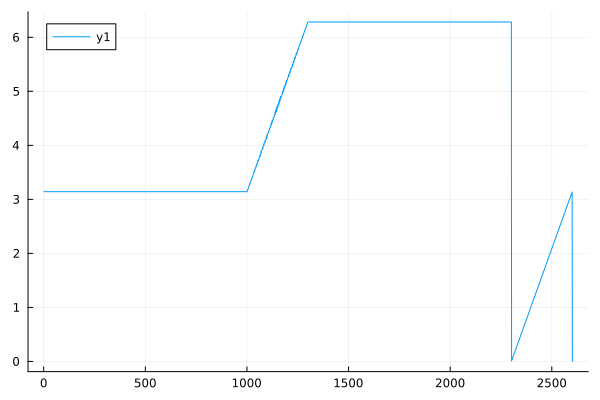

In [350]:
plot(1:N, ref_psi)

In [236]:
for (i,y) in enumerate(ref_y)
    if abs(y) < 0.1
        println(i)
    end
end

105
209
210


In [15]:
trajectory_data = DataFrame(CSV.File("traj2d.csv"));
M=  Matrix(trajectory_data)


1000×13 Matrix{Float64}:
  0.01  3.0      5.0      -0.14316   …   -1.60589  -11.3203     2.6112
  0.02  3.00001  5.0      -0.142875      -1.57978  -11.3203     2.6112
  0.03  3.00005  4.99999  -0.142588      -1.55367  -11.3203     2.6112
  0.04  3.00012  4.99998  -0.142299      -1.52755  -11.3203     2.6112
  0.05  3.00023  4.99997  -0.142009      -1.50144  -11.3203     2.6112
  0.06  3.0004   4.99994  -0.141716  …   -1.47533  -11.3203     2.6112
  0.07  3.00063  4.99991  -0.141421      -1.44922  -11.3203     2.6112
  0.08  3.00094  4.99987  -0.141124      -1.42311  -11.3203     2.6112
  0.09  3.00134  4.99981  -0.140825      -1.39699  -11.3203     2.6112
  0.1   3.00184  4.99974  -0.140524      -1.37088  -11.3203     2.6112
  0.11  3.00244  4.99965  -0.14022   …   -1.34477  -11.3203     2.6112
  0.12  3.00316  4.99955  -0.139915      -1.31866  -11.3203     2.6112
  0.13  3.004    4.99943  -0.139608      -1.29255  -11.3203     2.6112
  ⋮                                  ⋱    ⋮         

In [35]:
v = M[:,5]./M[:,4]
ref_traj = hcat(M[:,2],M[:,3],M[:,4],v)
ref_x = ref_traj[:,1]
ref_y = ref_traj[:,2]
ref_psi = ref_traj[:,3]
ref_v = ref_traj[:,4]

1000-element Vector{Float64}:
 -0.003933169549805175
 -0.01571123603492333
 -0.035302325212849164
 -0.06267495657987412
 -0.09779805415903843
 -0.14064095764471415
 -0.1911734339176607
 -0.24936568894499775
 -0.31518838008017536
 -0.3886126287787564
 -0.4696100337464321
 -0.558152684536606
 -0.6542131756154879
  ⋮
 -0.007294062674633096
 -0.006063877780571473
 -0.004940685735225966
 -0.003926626305248436
 -0.0030238401952035407
 -0.002234469032217937
 -0.0015606553517073353
 -0.0010045425825303946
 -0.0005682750320517824
 -0.00025399787322619855
 -6.38571299950309e-5
  3.8482814784449754e-10

In [19]:
function mpc_solver(state, T, dt, L, Q, R, step, u_prev, reference_trajectory, obstacles)
    
#     if step+T > size(reference_trajectory)[1]
#         T = size(reference_trajectory)[1] - step + 1
#         println("HELLO ", step, " ", T)
#     end
    
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, x[1:T+1])
    @variable(model, y[1:T+1])
    @variable(model, psi[1:T+1])
    @variable(model, v[1:T+1])
    @variable(model, delta[1:T])
    @variable(model, a[1:T])
    
    # warm start up from previous output
    set_start_value(delta[1], u_prev[1])
    set_start_value(a[1], u_prev[2])

    #closest_refs = [find_closest_ref(x[i],y[i]) for i in 1:N]
   
    #idx = (step+i-1)%N
    @NLexpression(model, err, sum( (Q[1]*(x[i] - reference_trajectory[(step+i-1)%N + 1,1])^2 + Q[2]*(y[i] - reference_trajectory[(step+i-1)%N + 1,2])^2
                    + Q[3]*(psi[i] - reference_trajectory[(step+i-1)%N + 1,3])^2 + Q[4]*(v[i] - reference_trajectory[(step+i-1)%N + 1,4]))^2 for i in 1:T))

    @NLexpression(model, input, sum( (R[1]*delta[i]^2 + R[2]*a[i]^2) for i in 1:T))

    @NLobjective(model, Min, err + input)

    # Bicycle model constraint
    for i in 1:T-1
        @NLconstraint(model, x[i+1] == x[i] + v[i] * cos(psi[i]) * dt) 
        @NLconstraint(model, y[i+1] == y[i] + v[i] * sin(psi[i]) * dt)  
        @NLconstraint(model, psi[i+1] == psi[i] + (v[i] * tan(delta[i]) / L) * dt)
        @constraint(model, v[i+1] ==  v[i] + a[i]*dt)
        #@constraint(model, v[i+1] ==  1)
    end

    #@constraint(model, vel[i in 1:N], v)
    
    # set initial constraint
    @constraint(model, x[1]   == state[1])
    @constraint(model, y[1]   == state[2])
    @constraint(model, psi[1] == state[3])
    @constraint(model, v[1]   == state[4])
    
    # control input constraints
    @constraint(model, a_up[i in 1:T], a[i] <= 0.2)
    @constraint(model, a_lb[i in 1:T], a[i] >= -0.2)
    
    @constraint(model, delta_up[i in 1:T], delta[i] <= pi/6)
    @constraint(model, delta_lb[i in 1:T], delta[i] >= -pi/6)
    
    # # obstacle constraint
    # num_obstacles = size(obstacles)[1] 
    # if num_obstacles > 0
    #     for o in 1:num_obstacles
    #         #@NLconstraint(model, obs_constr[i in 1:T], (x[i] - obstacles[o,1])^2 + (y[i]-obstacles[o,2])^2 >= obstacles[o,3]^2)
    #        for i in 1
    #             @NLconstraint(model, (x[i] - obstacles[o,1])^2 + (y[i]-obstacles[o,2])^2 >= obstacles[o,3]^2)
    #         end
    #     end
    # end

    optimize!(model)
    return value.(delta[1]), value.(a[1]), objective_value(model)
end

mpc_solver (generic function with 1 method)

In [52]:
T = 10
dt = 0.01
L = 2
Q = [10.0, 10.0, 1.0, 1.0]
R = [0.1, 0.1]
#initial_state = [0.0, 0.0, 0, 1.0]
initial_state = ref_traj[1,:]
num_steps = size(ref_traj)[1]

state = initial_state
state_mat =  Matrix{Float64}(undef, num_steps,4)
control_mat =  Matrix{Float64}(undef, num_steps,2)
err_vec = []
delta_prev = 0
a_prev = 0
for step in 1:num_steps
    t = step * dt
    delta, a, err = mpc_solver(state, T, dt, L, Q, R, step, [delta_prev, a_prev], ref_traj, obstacles)
    state = bicycle_model(state, [delta, a], dt, L)
    state_mat[step,:] = state
    control_mat[step,:] = [delta, a]
    append!(err_vec, err)
    delta_prev = delta
    a_prev = a
    println("Step: ", step, ", State: ", state, ", Control Input: (", delta, ", ", a, ")")
    #break
end


Step: 1, State: [2.9999629491483506, 5.000005340606925, -0.14316019406879582, -0.0057679364133072335], Control Input: (-1.6365008921827245e-6, -0.18347668635020584)
Step: 2, State: [2.999905859840129, 5.0000135698191315, -0.14316019397130794, -0.007766890016709337], Control Input: (-3.380338126745892e-6, -0.1998953603402104)
Step: 3, State: [2.999828985487445, 5.000024650972166, -0.14316019372881986, -0.009766544313254202], Control Input: (-6.2441489791130314e-6, -0.19996542965448644)
Step: 4, State: [2.9997323191550453, 5.000038585065701, -0.14316019321588055, -0.011766342028432254], Control Input: (-1.0504007819201637e-5, -0.19997977151780513)
Step: 5, State: [2.9996158594234092, 5.000055372304313, -0.14316019224182727, -0.013766203294449279], Control Input: (-1.655660320121427e-5, -0.19998612660170256)
Step: 6, State: [2.9994796056635176, 5.00007501277859, -0.1431601905312203, -0.015766100026302216], Control Input: (-2.4852269358502095e-5, -0.19998967318529373)
Step: 7, State: [2.99

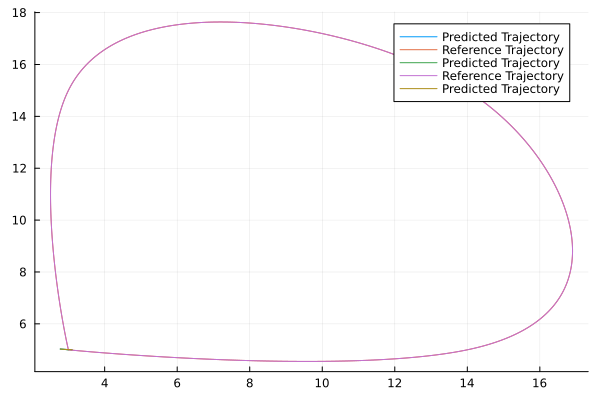

In [58]:
x = state_mat[:,1];
y = state_mat[:,2];
plot!(ref_x[1:num_steps], ref_y[1:num_steps], label="Reference Trajectory")
plot!(x,y, label="Predicted Trajectory")
#scatter!(obstacles[:,1], obstacles[:,2],label="obstacle")
# Julia clear plot

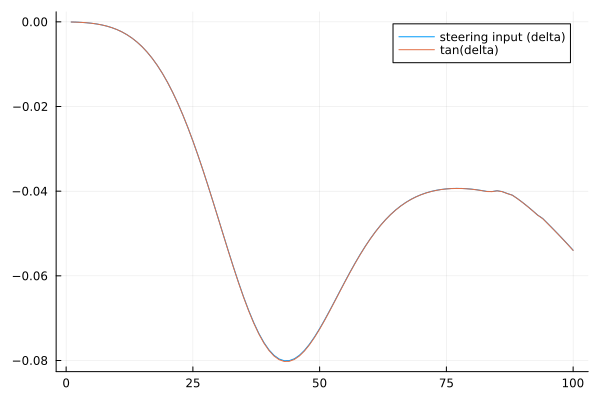

In [37]:
plot(1:num_steps, [control_mat[:,1], tan.(control_mat[:,1])], label=["steering input (delta)" "tan(delta)"])

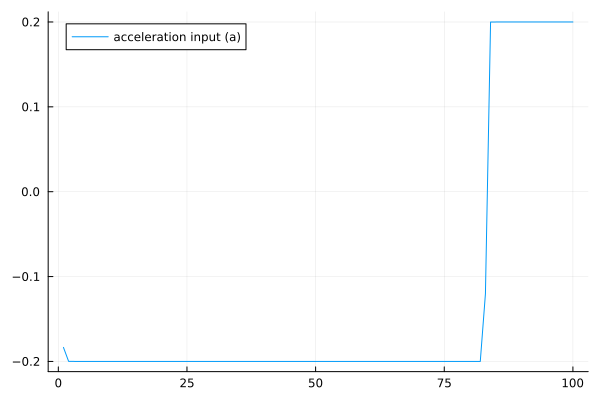

In [23]:
plot(1:num_steps, control_mat[:,2], label="acceleration input (a)")

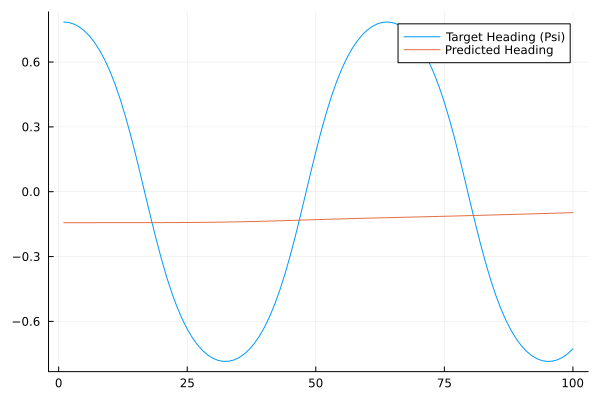

In [22]:
plot(1:num_steps, [ref_psi[1:num_steps],state_mat[:,3]], label=["Target Heading (Psi)" "Predicted Heading"])

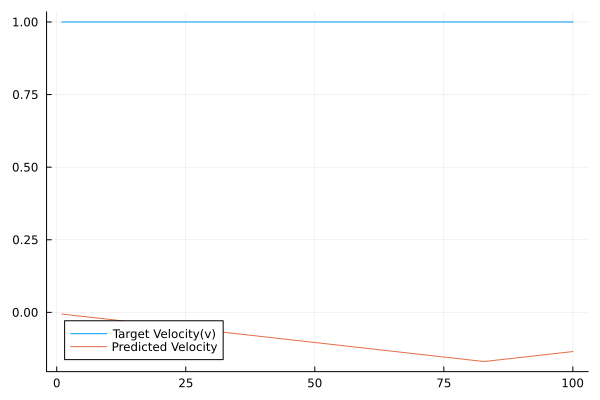

In [34]:
plot(1:num_steps, [ref_v[1:num_steps],state_mat[:,4]], label=["Target Velocity(v)" "Predicted Velocity"])

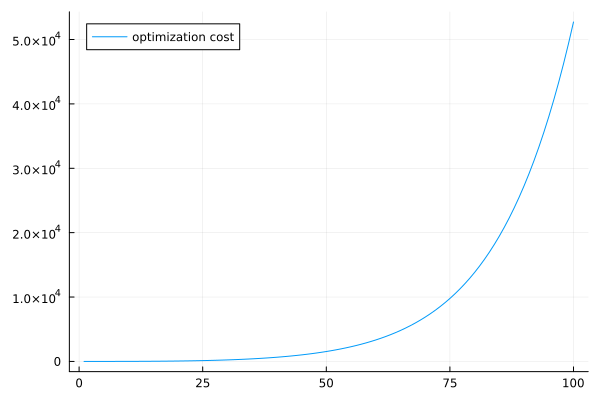

In [26]:
plot(1:num_steps, err_vec, label = "optimization cost")

In [28]:
x

100-element Vector{Float64}:
 2.9999629491483506
 2.9999058598369226
 2.9998289854805384
 2.999732319142937
 2.9996158594022386
 2.9994796056246518
 2.9993235574503183
 2.999147716049294
 2.998952079838243
 2.998736648669284
 2.99850142240247
 2.9982464008900567
 2.9979715839623897
 ⋮
 2.919598548289102
 2.918037425285756
 2.9164960852392787
 2.9149745306444785
 2.9134727639601428
 2.9119907876359767
 2.9105286047516827
 2.909086217595167
 2.9076636285453743
 2.906260840054717
 2.904877854626213
 2.903514674815805

In [86]:
400*0.01

4.0